<pre><code>Prabhu Kiran<br>20K45A0215<br><a href="https://www.github.com/Prabhukiran8790">Github/PrabhuKiran8790</a></code></pre>


# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Getting Dataset

In [2]:
dataset = pd.read_csv('pH-Bicarbonate.csv')
dataset = dataset.rename(columns={'X':'pH_level', 'Y':'Bicarbonates'})

dataset.tail()

,pH_level,Bicarbonates
29,8.5,48
30,7.8,147
31,6.7,117
32,7.1,182
33,7.3,87


# Missing Value Treatment

In [3]:
dataset.isnull().sum()

pH_level        0
Bicarbonates    0
dtype: int64

# Outliers Treatment

In [4]:
outliers = []
def detect_outliers_zscore(dataset):
    thres = 3
    mean = np.mean(dataset)
    std = np.std(dataset)
    # print(mean, std)
    for i in dataset:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

sample_outliers_X = detect_outliers_zscore(dataset['pH_level'])
sample_outliers_Y = detect_outliers_zscore(dataset['Bicarbonates'])
print(f"Outliers in '{dataset.columns[0]}' column from Z-scores method: {len(sample_outliers_X)}")
print(f"Outliers in '{dataset.columns[1]}' column from Z-scores method: {len(sample_outliers_Y)}")

Outliers in 'pH_level' column from Z-scores method: 0
Outliers in 'Bicarbonates' column from Z-scores method: 0


# Data Split
- 90:10
- 90% training
- 10% testing

In [5]:
x = dataset['pH_level'].values.reshape(-1,1)
y = dataset['Bicarbonates'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)


pH Level Shape (rows, columns): (34, 1)
Bicarbonat Shape (rows, columns): (34, 1)

pH Level(training data) shape: (30, 1)
Bicarbonate(training data) shape: (30, 1)



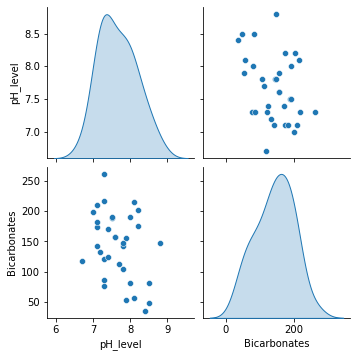

In [6]:
print(f"""
pH Level Shape (rows, columns): {x.shape}
Bicarbonat Shape (rows, columns): {x.shape}

pH Level(training data) shape: {x_train.shape}
Bicarbonate(training data) shape: {y_train.shape}
""")
sns.pairplot(dataset, diag_kind='kde')

# Initializing SGDRegressor Parameters
- 500000
- tolerance = 0.0001
- learning rate = 0.01

In [7]:
sgd_reg = SGDRegressor(max_iter=500000,
                       tol=0.0001,
                       eta0=0.01,
                       learning_rate='adaptive',
                       n_iter_no_change=50000)
sgd_reg.fit(x_train,y_train.ravel())

SGDRegressor(learning_rate='adaptive', max_iter=500000, n_iter_no_change=50000,
             tol=0.0001)

In [8]:
print(f"""
coeffecient: {sgd_reg.coef_}
Intercept: {sgd_reg.intercept_}
""")


coeffecient: [-31.34165624]
Intercept: [380.65064776]



# Error Metrics of testing Data.
- actual vs predicted

In [9]:
from math import sqrt
num_data = x.shape[0]
y_pred = sgd_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rse = mse*num_data
rse /= num_data-2
rse = sqrt(rse)
r2_score = sgd_reg.score(x_test,y_test)
print('RMSE: ', rmse)
print('RSE: ', rse)
print('R²:' , sgd_reg.score(x_test,y_test))

RMSE:  35.42501732726228
RSE:  36.515272057409554
R²: 0.14320846416943334


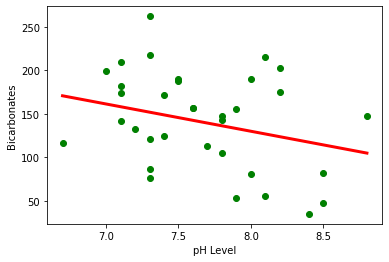

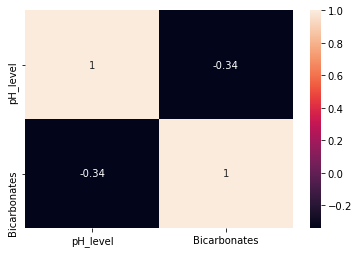

<AxesSubplot:xlabel='pH_level', ylabel='Bicarbonates'>

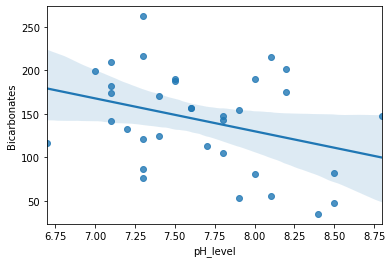

In [10]:
plt.scatter(x, y, color='g') # Scatter-plot of X & Y as in Step 3
plt.xlabel('pH Level')
plt.ylabel('Bicarbonates')
x_ht_samples = np.linspace(x.min(), x.max(), num=50)
y_ht_prediction = sgd_reg.predict(x_ht_samples.reshape(-1,1))
plt.plot(x_ht_samples, y_ht_prediction, color='r', linewidth=3)
plt.show()

corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()
sns.regplot(x = 'pH_level', y = 'Bicarbonates', data = dataset)

# Training and Testing Scores

In [11]:
print("Training set score:",sgd_reg.score(x_train,y_train))
print("Test set score:",sgd_reg.score(x_test,y_test))

Training set score: 0.07682114780714766
Test set score: 0.14320846416943334


# Model dumping and Deployment

In [12]:
import pickle
# Save the model
filename = 'Assignment4_sgd.pkl'
pickle.dump(sgd_reg, open(filename, 'wb'))

In [13]:
user_ip = float(input("Enter pH Level: "))
adv = np.array(float(user_ip))
adv = adv.reshape(-1,1)
sales=sgd_reg.predict(adv)
print('pH Level: ',float(user_ip))
print('Bicarbonates: ',sales)

pH Level:  7.5
Bicarbonates:  [145.58822599]


# Predicting using Saved Model

In [14]:
model = pickle.load(open('Assignment4_sgd.pkl', 'rb'))
user_ip = float(input("Enter pH Level: "))
adv=np.array(float(user_ip))
adv=adv.reshape(-1,1)
prediction = model.predict(adv)
result = prediction[0]
print('pH Level: ',float(user_ip))
print('Bicarbonates: ',sales)

pH Level:  7.5
Bicarbonates:  [145.58822599]
